--- 開始模擬數據與模型訓練 ---
已產生 100 筆模擬數據。


/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25836 (\N{CJK UNIFIED IDEOGRAPH-64EC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25818 (\N{CJK UNIFIED IDEOGRAPH-64DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 40670 (\N{CJK UNIFIED IDEOGRAPH-9EDE}) missing from font(s) DejaVu Sans.
  fig.canvas.prin

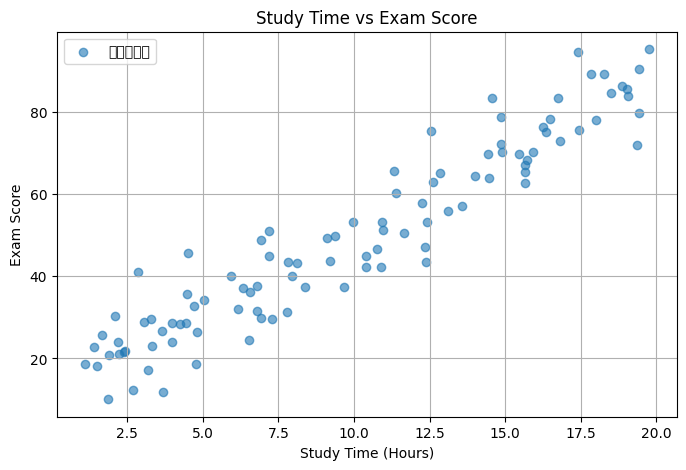


訓練集大小: 80 筆, 測試集大小: 20 筆

正在訓練線性迴歸模型...
模型訓練完成。
  - 模型斜率 (coef_): 3.8310
  - 模型截距 (intercept_): 11.3123

--- 模型評估 (測試集) ---
均方誤差 (MSE): 41.8368
R 平方分數 (R²): 0.9210


/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32771 (\N{CJK UNIFIED IDEOGRAPH-8003}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.prin

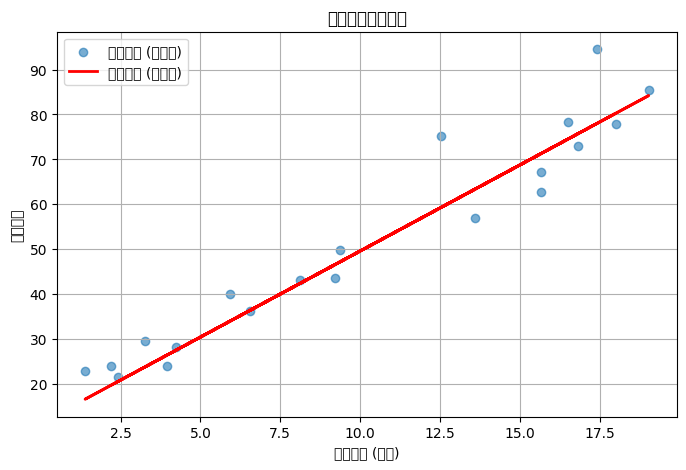


準備將模型儲存至: /app/models/linear_regression_model.joblib
模型已成功儲存為 linear_regression_model.joblib。

--- 訓練與儲存筆記本執行完畢 ---


In [3]:
# -*- coding: utf-8 -*-
# Content for linear_regression_sklearn/notebooks/train_linear_regression.ipynb
# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: light
#       format_version: '1.5'
#       jupytext_version: 1.14.5
#   kernelspec:
#     display_name: Python 3 (ipykernel)
#     language: python
#     name: python3
# ---

# # 讀書時間預測考試分數 (Scikit-learn 線性迴歸)

# ## 1. 匯入函式庫
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib # 用於儲存模型
import os     # 用於處理路徑
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

print("--- 開始模擬數據與模型訓練 ---")

# ## 2. 產生模擬數據
np.random.seed(42)
num_samples = 100
study_time_hours = np.random.rand(num_samples, 1) * 19 + 1
noise = np.random.randn(num_samples, 1) * 8
exam_score = 10 + 4 * study_time_hours + noise
exam_score = np.clip(exam_score, 0, 100)
print(f"已產生 {num_samples} 筆模擬數據。")

# ## 3. 資料視覺化 (可選)
# try:
#     plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei']
#     plt.rcParams['axes.unicode_minus'] = False
# except Exception as e:
#     print(f"無法設定中文字型: {e}")
plt.figure(figsize=(8, 5))
plt.scatter(study_time_hours, exam_score, alpha=0.6, label='模擬數據點')
plt.title('Study Time vs Exam Score')
plt.xlabel('Study Time (Hours)')
plt.ylabel('Exam Score')
plt.grid(True); plt.legend(); plt.show()

# ## 4. 資料分割
X = study_time_hours
y = exam_score.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\n訓練集大小: {X_train.shape[0]} 筆, 測試集大小: {X_test.shape[0]} 筆")

# ## 5. 建立並訓練線性迴歸模型
model = LinearRegression()
print("\n正在訓練線性迴歸模型...")
model.fit(X_train, y_train)
print("模型訓練完成。")
print(f"  - 模型斜率 (coef_): {model.coef_[0]:.4f}")
print(f"  - 模型截距 (intercept_): {model.intercept_:.4f}")

# ## 6. 評估模型效能 (測試集)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n--- 模型評估 (測試集) ---")
print(f"均方誤差 (MSE): {mse:.4f}")
print(f"R 平方分數 (R²): {r2:.4f}")

# ## 7. 視覺化預測結果
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, alpha=0.6, label='實際分數 (測試集)')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='預測分數 (迴歸線)')
plt.title('線性迴歸預測結果')
plt.xlabel('讀書時間 (小時)'); plt.ylabel('考試分數')
plt.grid(True); plt.legend(); plt.show()

# ## 8. 儲存模型
# *** 模型儲存路徑 (在容器內相對於 /app) ***
model_dir = "/app/models" # 容器內的絕對路徑
model_filename = "linear_regression_model.joblib" # 模型檔名
model_save_path = os.path.join(model_dir, model_filename)

os.makedirs(model_dir, exist_ok=True) # 建立目錄
print(f"\n準備將模型儲存至: {model_save_path}")
try:
    joblib.dump(model, model_save_path) # 使用 joblib 儲存模型
    print(f"模型已成功儲存為 {model_filename}。")
except Exception as e:
    print(f"儲存模型時發生錯誤: {e}")

print("\n--- 訓練與儲存筆記本執行完畢 ---")
